In [1]:
import numpy as np
import pandas as pd

In [3]:
df=pd.read_csv('spam.csv')

In [5]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
1484,ham,"Sorry, I'll call later",NaN,NaN,NaN
5389,ham,Ok.ok ok..then..whats ur todays plan,NaN,NaN,NaN
2124,ham,Beautiful Truth against Gravity.. Read careful...,NaN,NaN,NaN
5053,spam,Double Mins & Double Txt & 1/2 price Linerenta...,NaN,NaN,NaN
4350,ham,"Night has ended for another day, morning has c...",NaN,NaN,NaN


In [6]:
# 1. Data Cleaning
# 2. EDA 
# 3. Text Preprocessing
# 4. Model Building
# 5. Evaluation

# Data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
# drop last three columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [10]:
# renaming columns
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
2284,ham,"Velly good, yes please!"
3973,ham,Roger that. We���re probably going to rem in a...
1578,ham,How to Make a girl Happy? It's not at all diff...
1045,ham,"Come round, it's ."
3565,ham,Its ok..come to my home it vl nice to meet and...


In [11]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
# check missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
# check duplicates
df.duplicated().sum()

403

In [15]:
df=df.drop_duplicates(keep='first')

# EDA


In [16]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

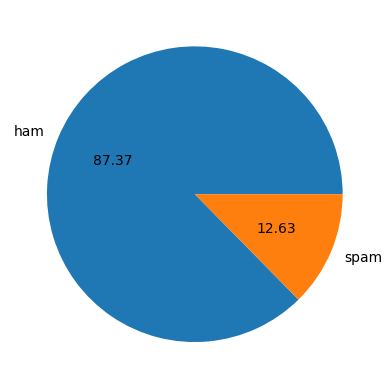

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

# data is imbalanced

In [21]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [22]:
df['numberof_characters']=df['text'].apply(len)

In [23]:
df['numberof_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [24]:
df['numberof_sentences']=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [25]:
df.head(5)

,target,text,numberof_characters,numberof_words,numberof_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [26]:
df.describe()

,target,numberof_characters,numberof_words,numberof_sentences
count,5169.000000,5169.000000,5169.000000,5169.000000
mean,0.126330,78.924163,18.456761,1.966531
std,0.332253,58.175349,13.325633,1.449833
min,0.000000,2.000000,1.000000,1.000000
25%,0.000000,36.000000,9.000000,1.000000
50%,0.000000,60.000000,15.000000,1.000000
75%,0.000000,117.000000,26.000000,2.000000
max,1.000000,910.000000,220.000000,38.000000


<Axes: xlabel='numberof_characters', ylabel='Count'>

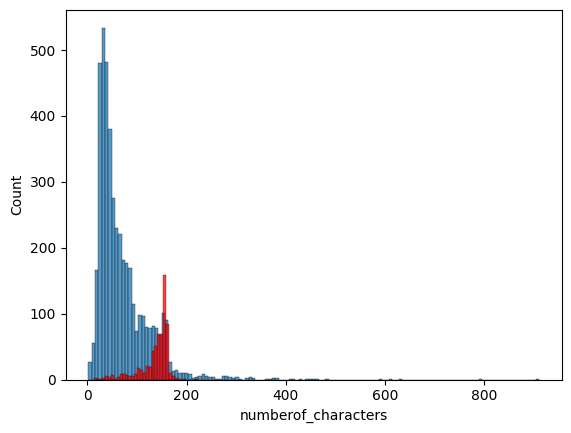

In [27]:
import seaborn as sns
sns.histplot(df[df['target']==0]['numberof_characters'])
sns.histplot(df[df['target']==1]['numberof_characters'],color='red')


<Axes: xlabel='numberof_words', ylabel='Count'>

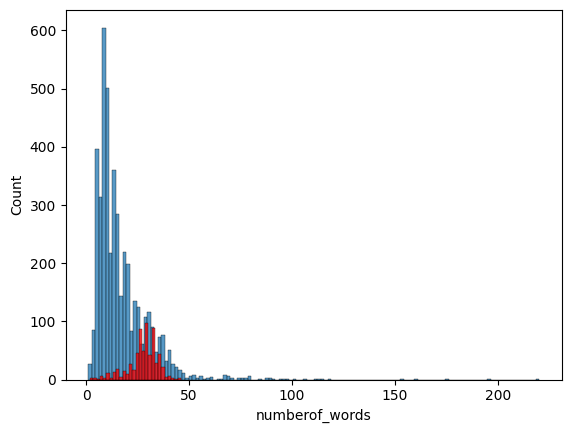

In [28]:
sns.histplot(df[df['target']==0]['numberof_words'])
sns.histplot(df[df['target']==1]['numberof_words'],color='red')


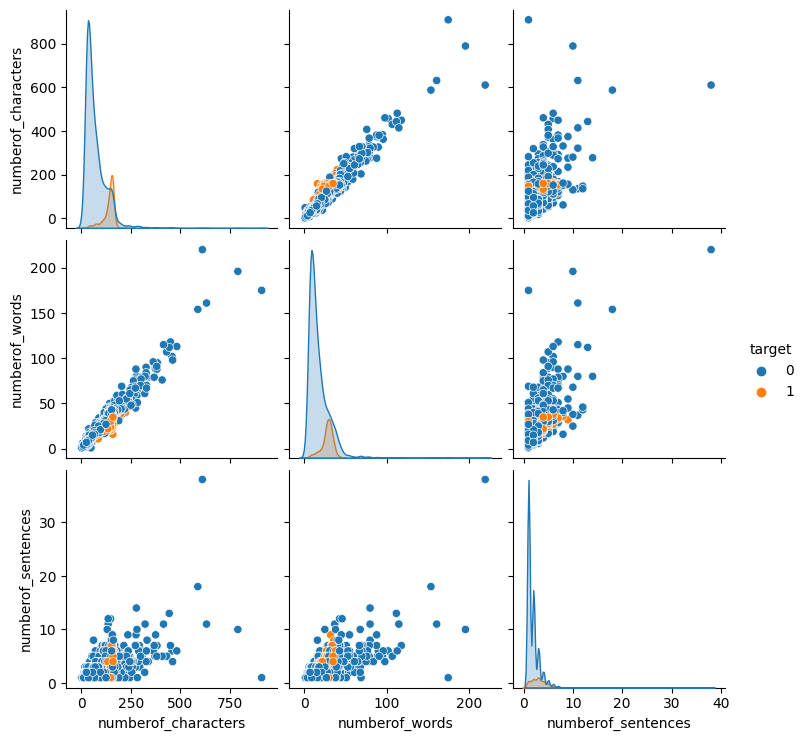

In [31]:
sns.pairplot(data=df,hue='target')

<Axes: >

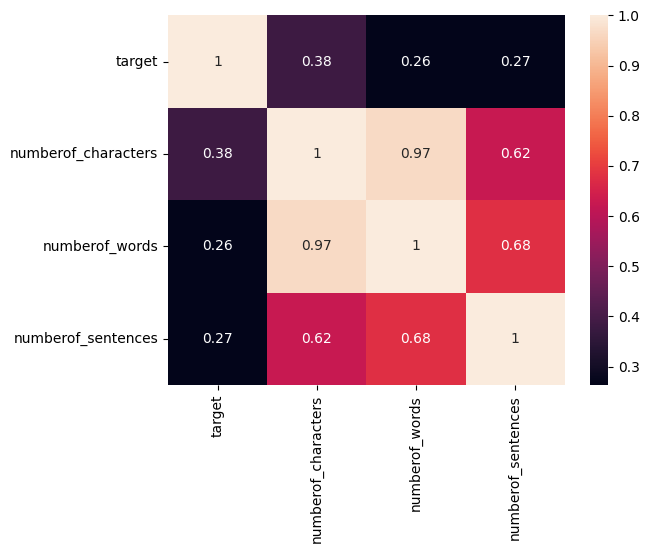

In [35]:
sns.heatmap(df.corr(numeric_only=True),annot=True)

In [ ]:
#  Thus there is high multi-collinearity, thus we will use only one of the three newly made columns

# Data/Text Preprocessing

In [36]:
# Lower case
# Tokenization
# Removing special characters
# Removing stop words and punctuation
# Stemming

In [47]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [43]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Admin\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [45]:
import string

In [49]:
from nltk.stem.porter import PorterStemmer # gives one word for all matching words
ps = PorterStemmer()

In [50]:
transform_text("I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.")


'gon na home soon want talk stuff anymor tonight k cri enough today'

In [51]:
df['transformed_text'] = df['text'].apply(transform_text)
df.head(5)

,target,text,numberof_characters,numberof_words,numberof_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [52]:
# world cloud is made to know which words appear most in spam messages
from wordcloud import WordCloud 
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')


In [53]:
spam_wc = wc.generate(df[df['target'] == 1]['transformed_text'].str.cat(sep=" "))


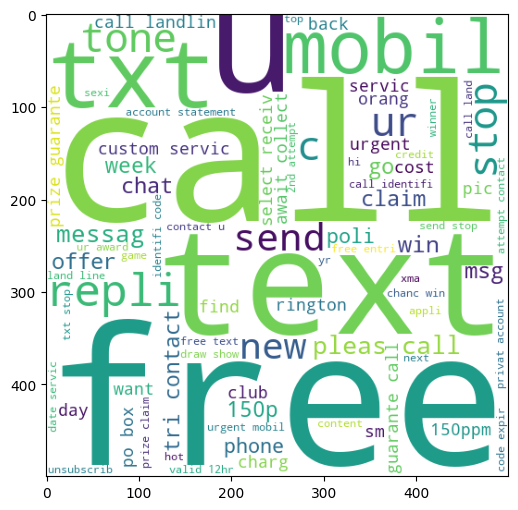

In [54]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

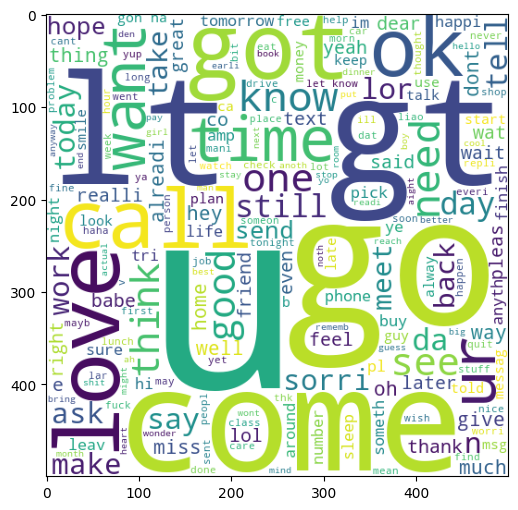

In [55]:
ham_wc = wc.generate(df[df['target'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [56]:
spam_corpus = []
for msg in df[df['target'] == 1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
len(spam_corpus)

9941

In [59]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

len(ham_corpus)


35305

# Model Building

In [61]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [62]:
X = tfidf.fit_transform(df['transformed_text']).toarray()
y = df['target'].values

In [63]:
from sklearn.model_selection import train_test_split

In [64]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [65]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [66]:
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [67]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8704061895551257
[[788 108]
 [ 26 112]]
0.509090909090909


In [68]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.971953578336557
[[896   0]
 [ 29 109]]
1.0


In [69]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [70]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))